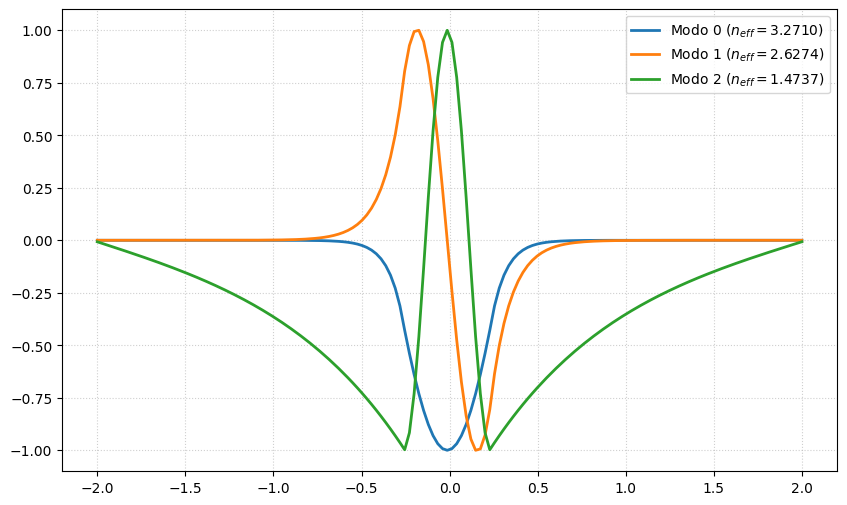

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig


lambda_0 = 1.55
k0 = 2 * np.pi / lambda_0

n_core = 3.47
n_clad = 1.44
core_lar = 0.5  # (um)


L = 4.0
N = 150
M = N
dx = L / N
delta = dx


x = np.linspace(-L / 2, L / 2, N)
n_sq = np.ones(N) * n_clad**2


indice_corei = np.argmin(np.abs(x - (-core_lar / 2)))
indice_coref = np.argmin(np.abs(x - (core_lar / 2)))
indice_coref = min(indice_coref, N)
n_sq[indice_corei:indice_coref] = n_core**2

D2 = np.zeros((M, N))
np.fill_diagonal(D2, -2)
np.fill_diagonal(D2[1:, :-1], 1)
np.fill_diagonal(D2[:-1, 1:], 1)
D2 = D2 / delta**2

k0_quadrado = k0**2
termo_diferencial = (1 / k0_quadrado) * D2
matriz_indice = np.diag(n_sq)
matriz_A = termo_diferencial + matriz_indice


autovalores, autovetores = eig(matriz_A)


n_eff_quadrado = np.real(autovalores)
indices_modos_guiados = np.where(n_eff_quadrado > n_clad**2)[0]

n_eff_quadrado_guiado = n_eff_quadrado[indices_modos_guiados]
autovetores_guiados = autovetores[:, indices_modos_guiados]


indices_ordenacao = np.argsort(n_eff_quadrado_guiado)[::-1]
n_eff_modos = np.sqrt(n_eff_quadrado_guiado[indices_ordenacao])
campos_modos = autovetores_guiados[:, indices_ordenacao]


plt.figure(figsize=(10, 6))


num_modos_para_plotar = min(len(n_eff_modos), 3)


for i in range(num_modos_para_plotar):
    campo = campos_modos[:, i]

    campo = np.real(campo) / np.max(np.abs(np.real(campo)))

    plt.plot(x, campo,
             label=f'Modo {i} ($n_{{eff}}={n_eff_modos[i]:.4f}$)',
             linewidth=2)


plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()